In [1]:
import dill
import scenicplus
infile = open('/home/adufour/work/scenic_omics/embryos/SCENIC/scplus_obj_pre.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

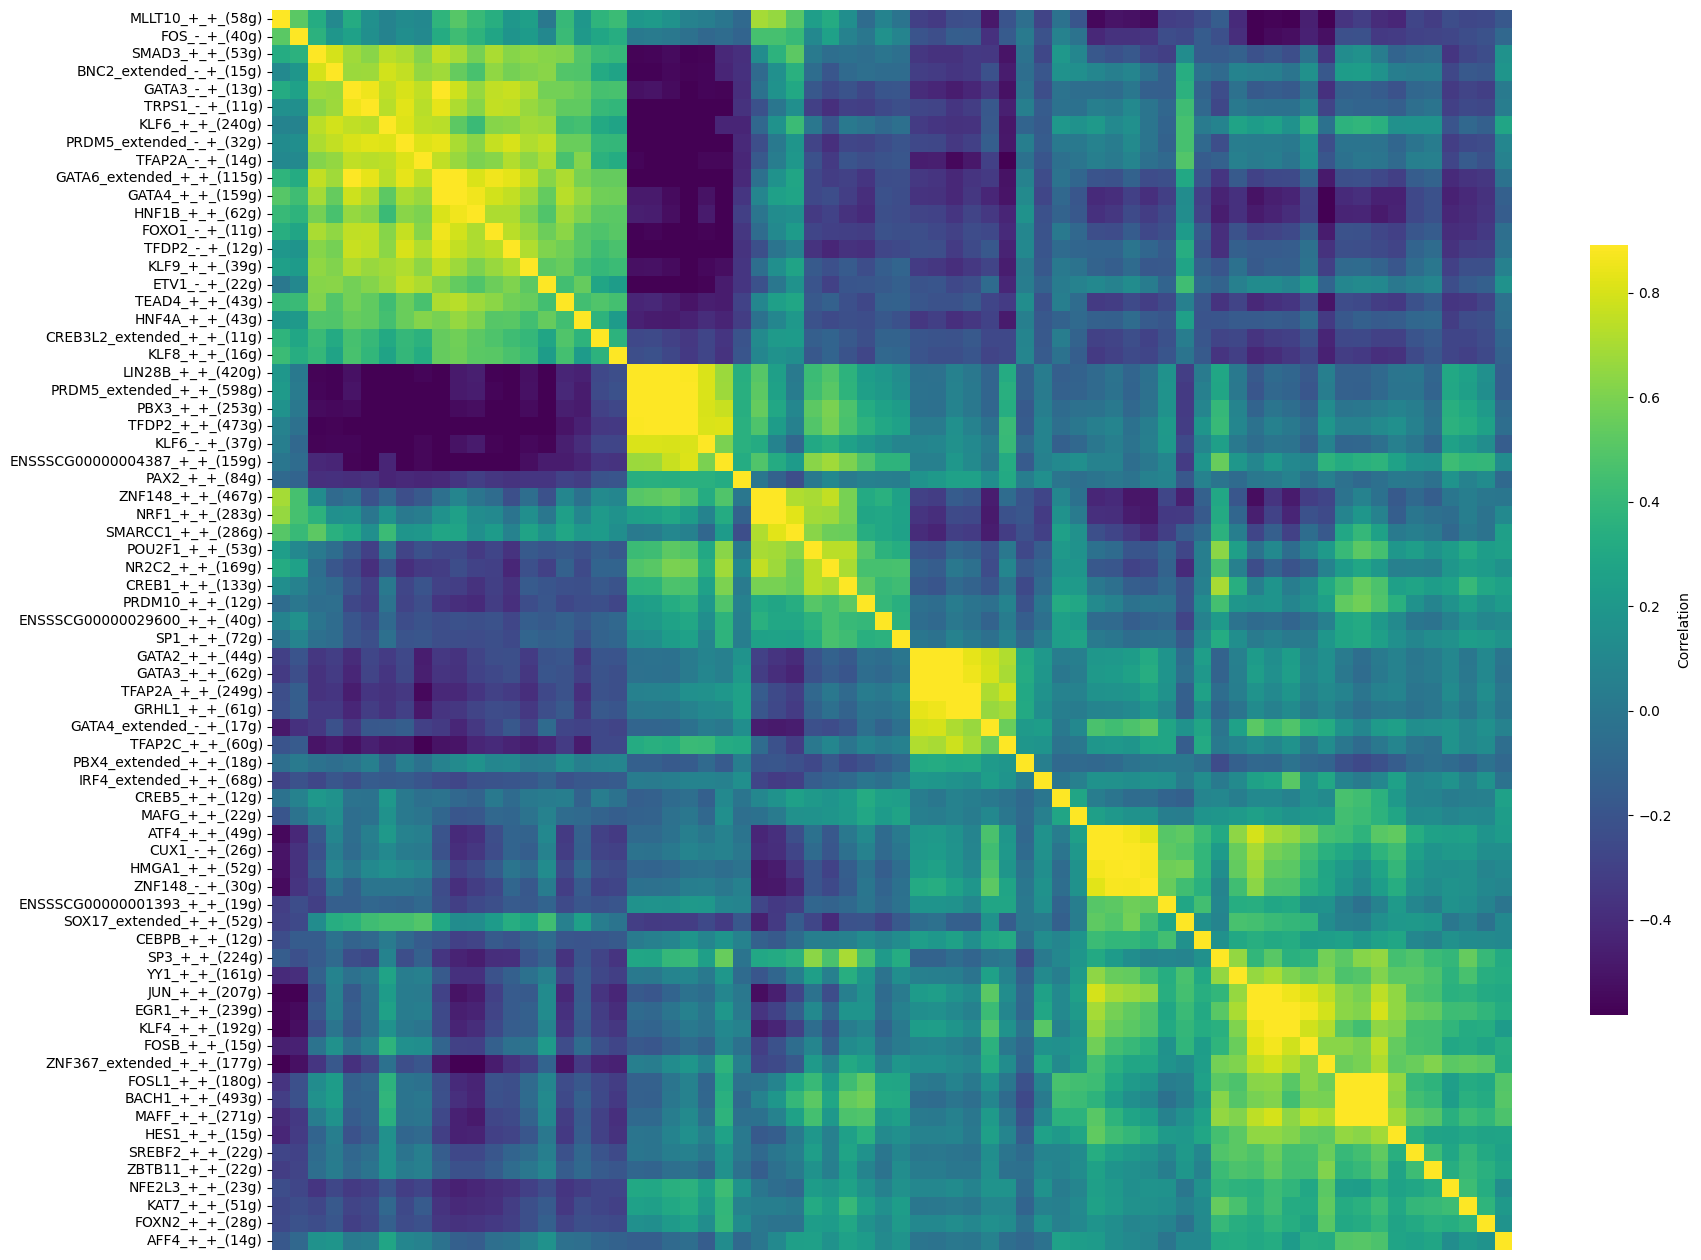

In [2]:
from scenicplus.plotting.correlation_plot import *
correlation_heatmap(scplus_obj,
                    auc_key = 'eRegulon_AUC',
                    signature_keys = ['Gene_based'],
                    selected_regulons = scplus_obj.uns['selected_eRegulons']['Gene_based'],
                    fcluster_threshold = 0.1,
                    use_plotly = False,
                    fontsize = 3)

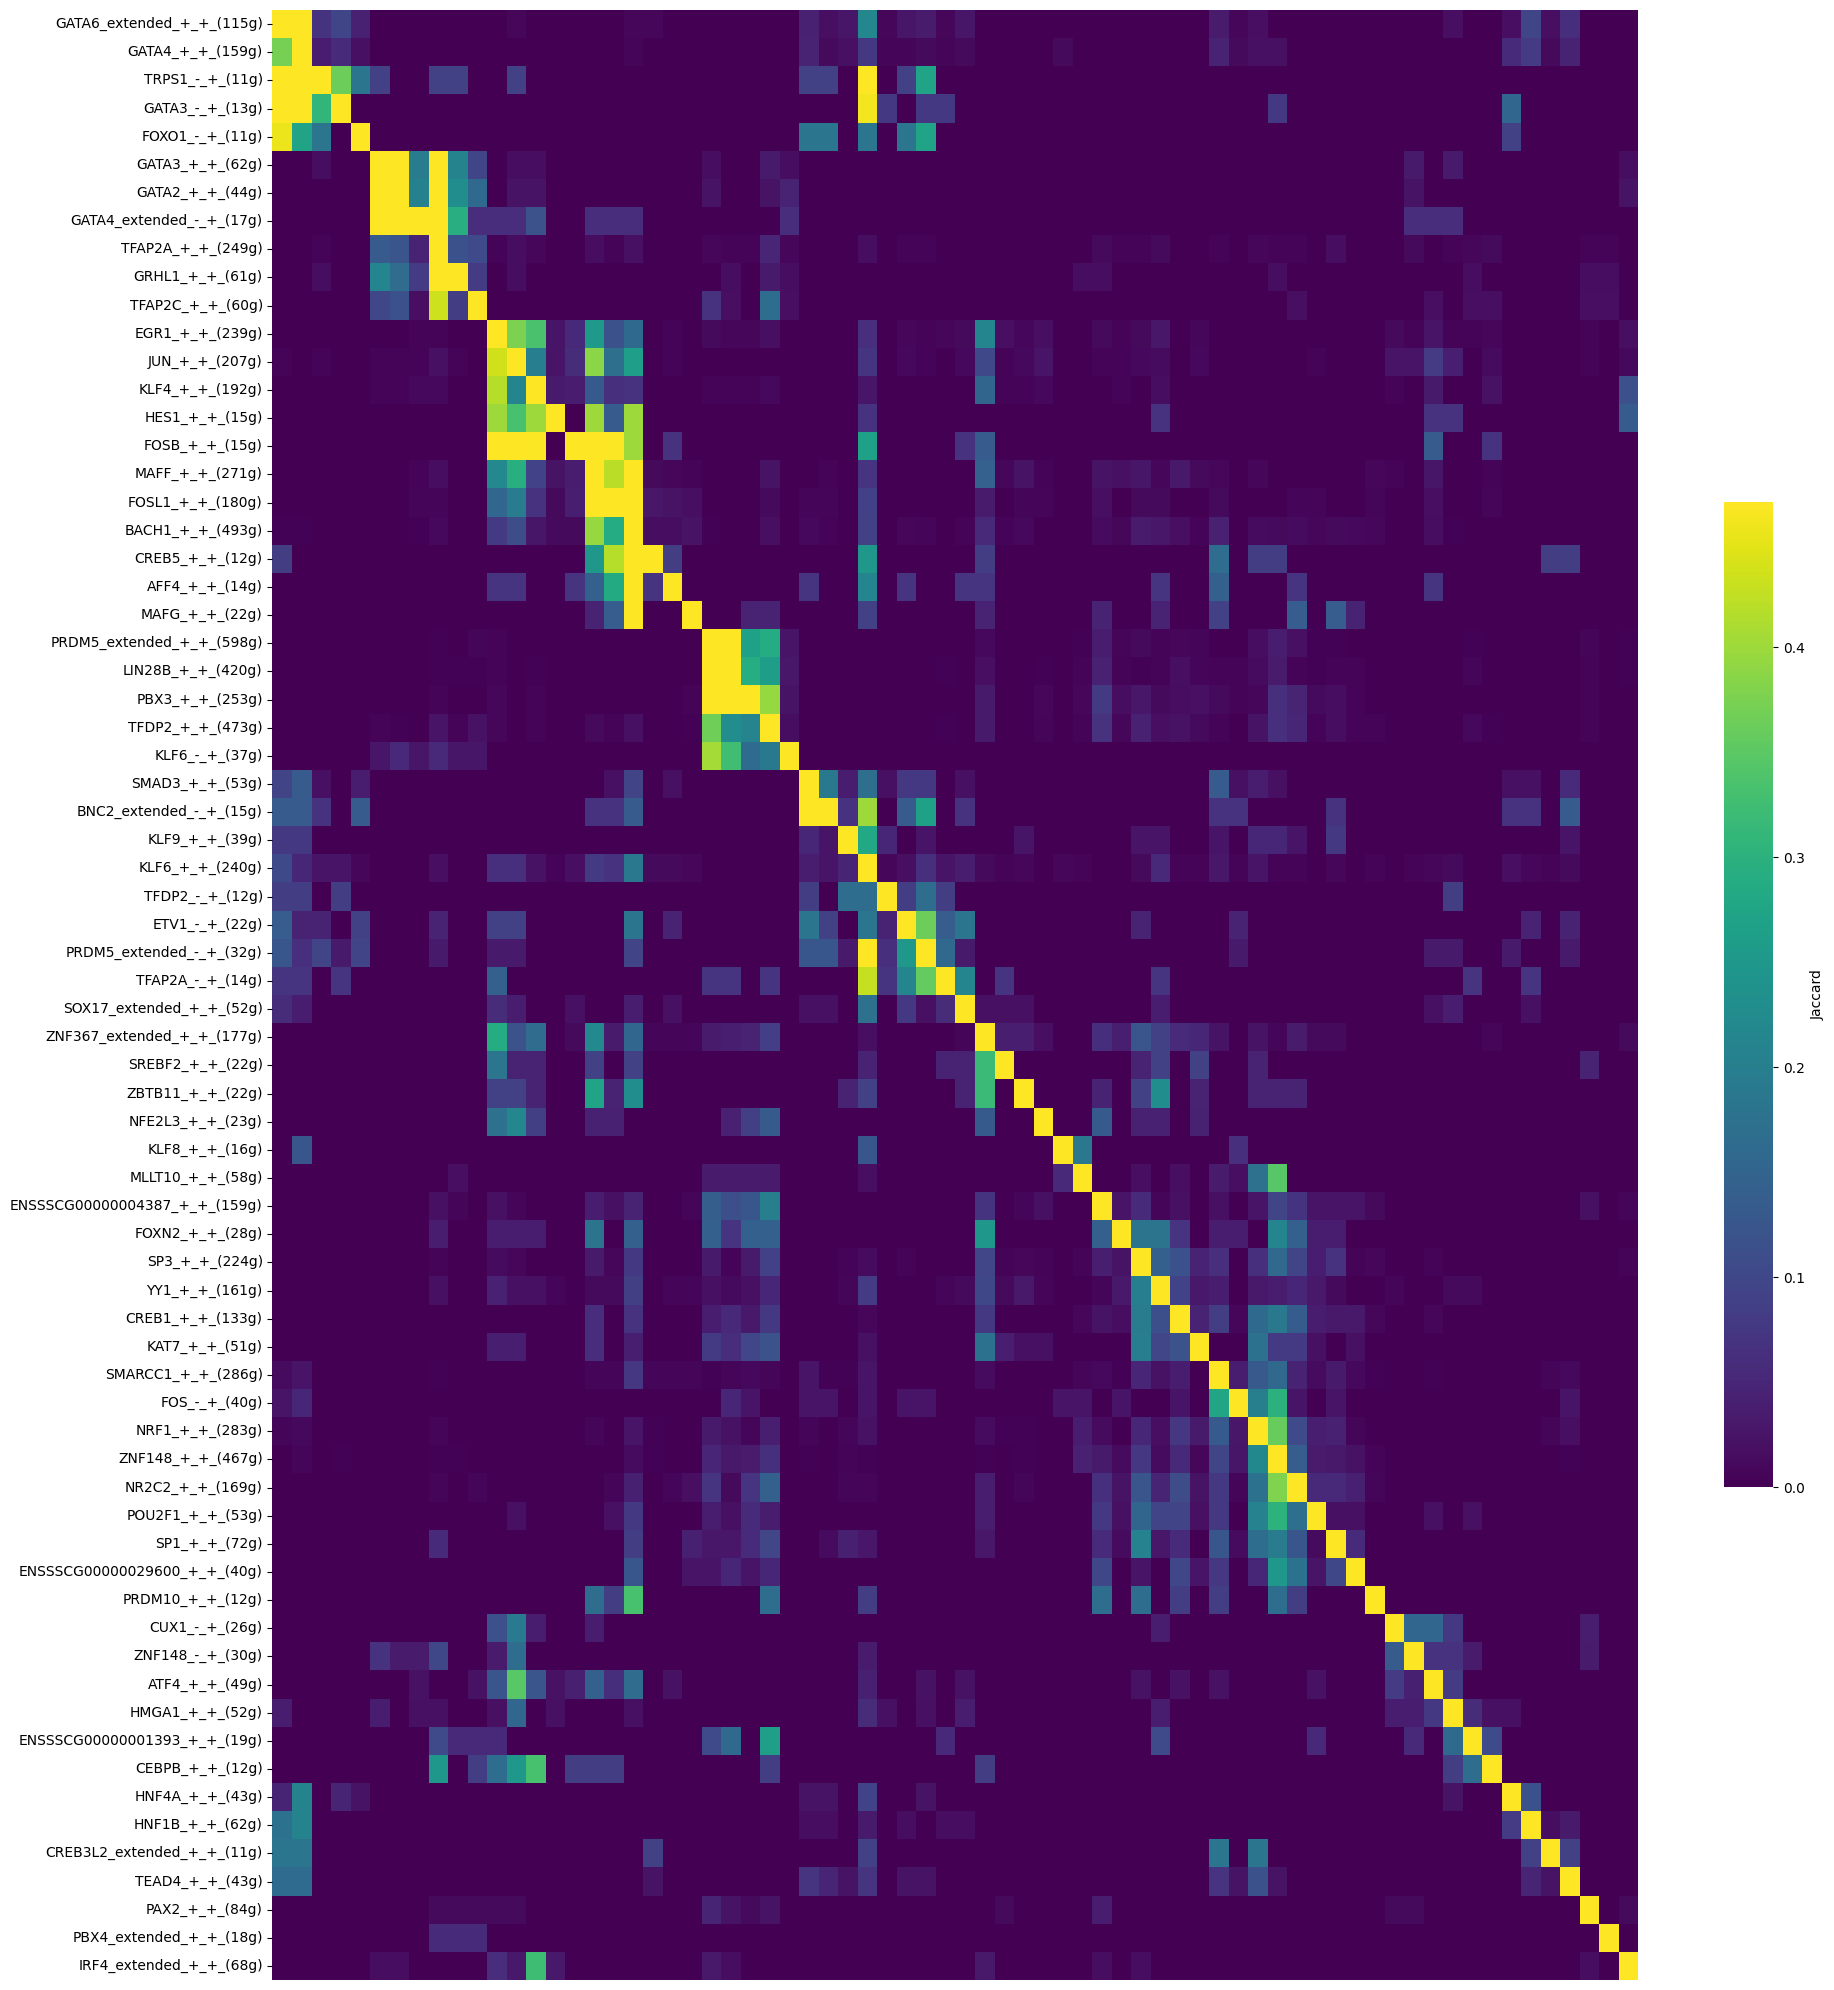

In [4]:
#from scenicplus.plotting.correlation_plot import *
jaccard_heatmap(scplus_obj,
                    gene_or_region_based = 'Gene_based',
                    signature_key = 'eRegulon_signatures',
                    selected_regulons = scplus_obj.uns['selected_eRegulons']['Gene_based'],
                    fcluster_threshold = 0.1,
                    fontsize = 3,
                    save = '/home/adufour/work/notebook/plots/omics/scenic_embryos_jaccard.svg',
                    use_plotly = False,
                    method='intersect')

In [6]:
from scenicplus.eregulon_enrichment import *
binarize_AUC(scplus_obj,
             auc_key='eRegulon_AUC',
             out_key='eRegulon_AUC_thresholds',
             signature_keys=['Gene_based', 'Region_based'],
             n_cpu=10)

In [7]:
from scenicplus.dimensionality_reduction import *
run_eRegulons_umap(scplus_obj,
                   reduction_name='eRegulons_UMAP_gb', scale=True, signature_keys=['Gene_based', 'Region_based'], selected_regulons=scplus_obj.uns['selected_eRegulons']['Gene_based'])
run_eRegulons_tsne(scplus_obj,
                   scale=True, signature_keys=['Gene_based', 'Region_based'], selected_regulons=scplus_obj.uns['selected_eRegulons']['Gene_based'])

/home/adufour/work/mambaforge-pypy3/envs/scenicplus2/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/adufour/work/mambaforge-pypy3/envs/scenicplus2/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/adufour/work/mambaforge-pypy3/

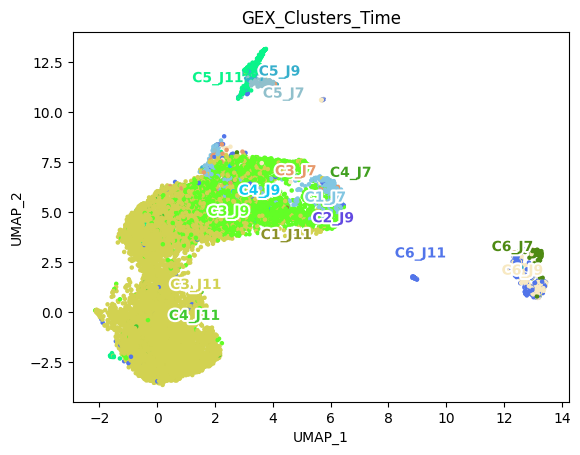

In [8]:
from scenicplus.dimensionality_reduction import *
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gb',
                 variables=['GEX_Clusters_Time'],
                 num_columns=1,
                 text_size=10,
                 dot_size=5)

In [9]:
find_clusters(scplus_obj,
              signature_keys=['Gene_based', 'Region_based'],
              k = 10,
              res = [0.6, 1.2, 1.5],
              prefix = 'SCENIC+_',
              scale = True)

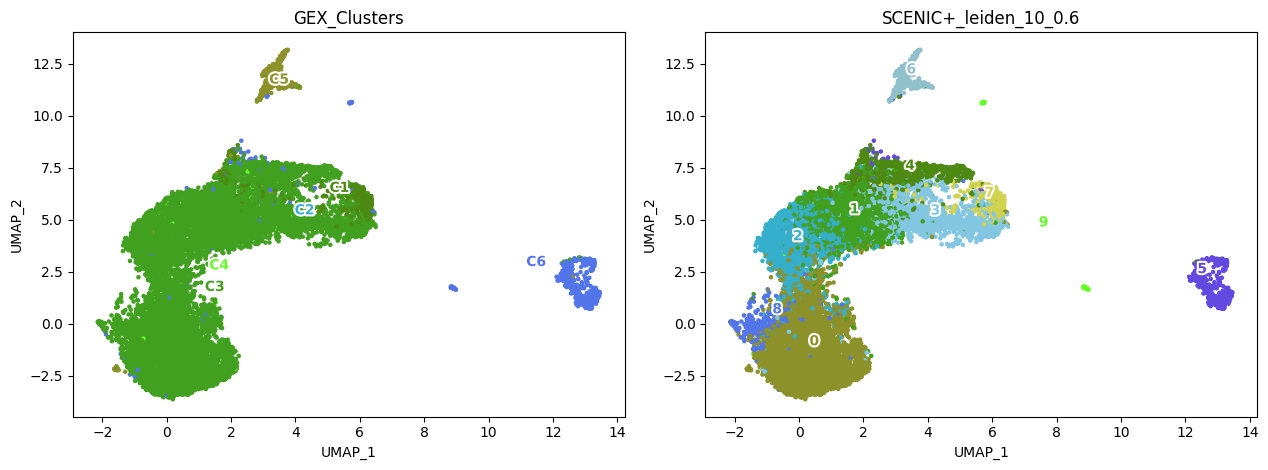

In [10]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gb',
                 variables=['GEX_Clusters', 'SCENIC+_leiden_10_0.6'],
                 num_columns=2,
                 text_size=10,
                 dot_size=5)

In [18]:
from scenicplus.RSS import *
regulon_specificity_scores(scplus_obj,
                         'GEX_Clusters_Time',
                         signature_keys=['Gene_based'],
                         selected_regulons=scplus_obj.uns['eRegulon_signatures']['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)

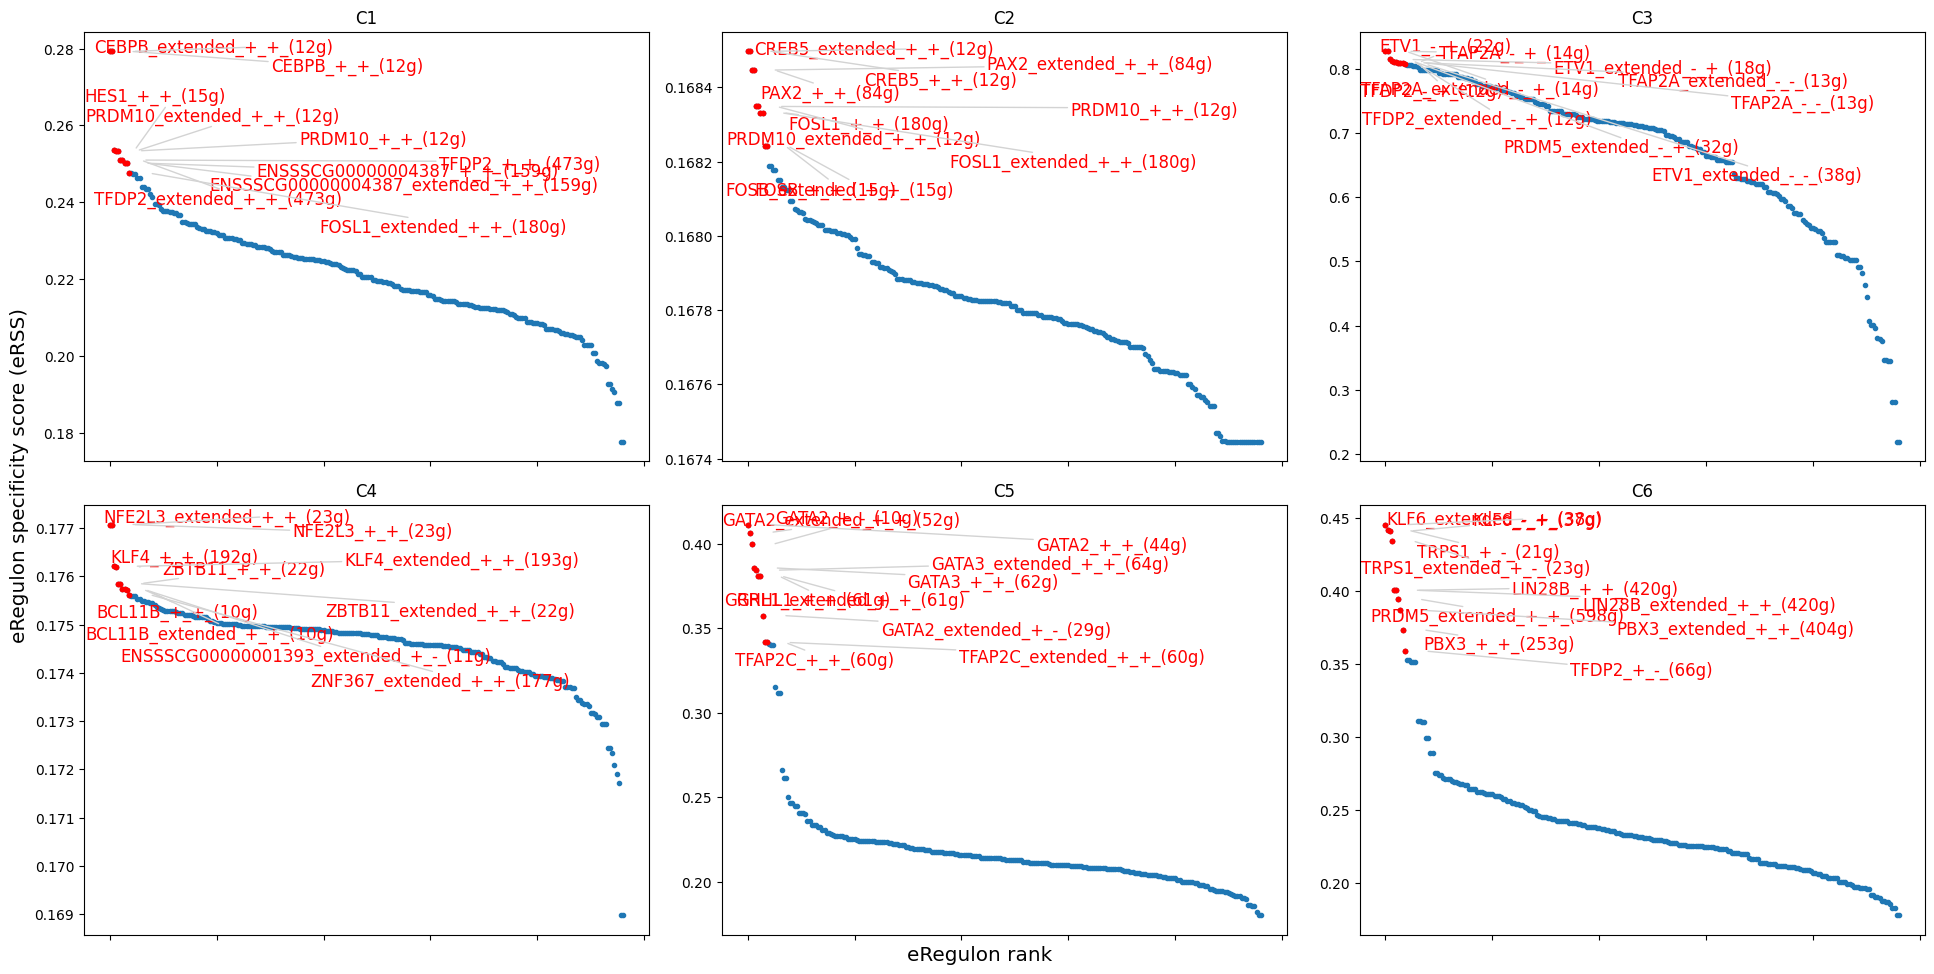

In [19]:
plot_rss(scplus_obj, 'GEX_Clusters_gene_based', num_columns=3, top_n=10)

In [20]:
import dill
import os
work_dir = '/home/adufour/work/scenic_omics/embryos/'
with open(os.path.join(work_dir, 'SCENIC/scplus_obj_pre.pkl'), 'wb') as f:
  dill.dump(scplus_obj, f)

In [2]:
import plotnine

from plotnine import *
from plotnine import data

In [2]:
size_matrix = scplus_obj.uns['eRegulon_AUC']['Gene_based']
color_matrix = scplus_obj.uns['eRegulon_AUC']['Region_based']
subset_eRegulons = scplus_obj.uns['selected_eRegulons']['Gene_based']

In [3]:
subset_eRegulons = [x.split('_(')[0] for x in subset_eRegulons]
size_matrix = size_matrix[[x for x in size_matrix if x.split('_(')[0] in subset_eRegulons]]
color_matrix = color_matrix[[x for x in color_matrix if x.split('_(')[0] in subset_eRegulons]]

In [5]:
scplus_obj.metadata_cell = scplus_obj.metadata_cell[scplus_obj.metadata_cell['GEX_Clusters'].str.contains("C2") ==False]

In [6]:
scplus_obj.metadata_cell = scplus_obj.metadata_cell[scplus_obj.metadata_cell['GEX_Clusters'].str.contains("C4") ==False]

In [7]:
size_matrix = size_matrix.loc[scplus_obj.metadata_cell.index]

In [8]:
color_matrix = color_matrix.loc[scplus_obj.metadata_cell.index]

In [9]:
from scenicplus.plotting.dotplot import *
from plotnine import guide_legend
plot = heatmap_dotplot(
        scplus_obj = scplus_obj,
        size_matrix = size_matrix,
        color_matrix = color_matrix,
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'GEX_Clusters_Time',
        subset_eRegulons = subset_eRegulons,
        figsize = (35, 15),
        orientation = 'horizontal',
        split_repressor_activator=True)

In [10]:
plotting_df = generate_dotplot_df(
        scplus_obj = scplus_obj,
        size_matrix = size_matrix,
        color_matrix = color_matrix,
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'GEX_Clusters',
        subset_eRegulons = subset_eRegulons)

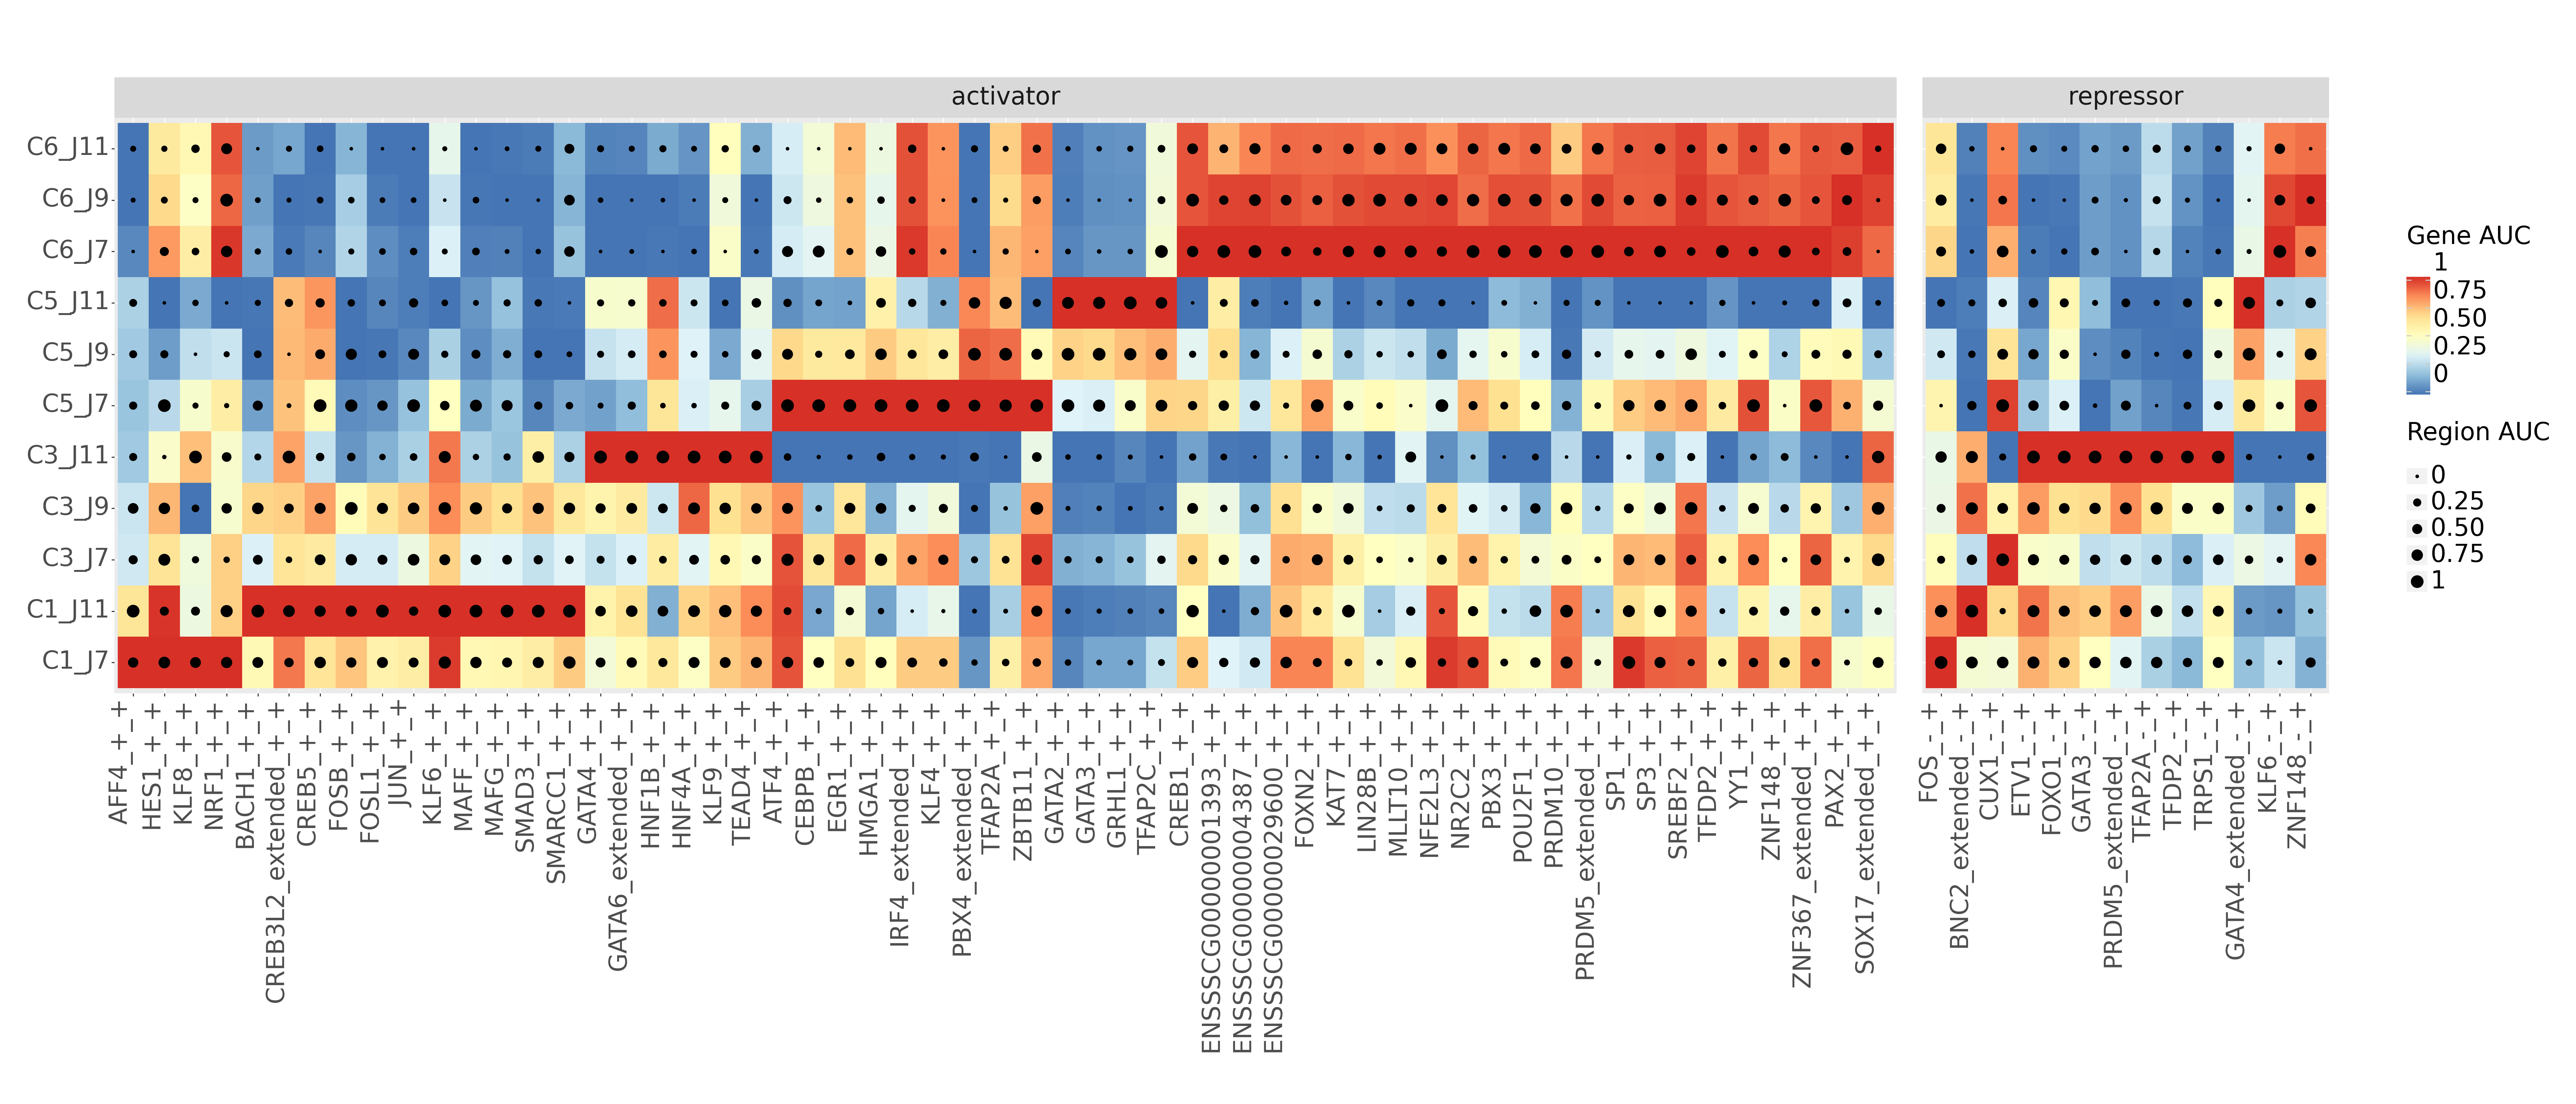

<Figure Size: (3500 x 1500)>

In [11]:
plot = plot + labs(size = 'Region AUC', fill = "Gene AUC") + theme(text=element_text(size = 24),axis_title_x=element_blank(),axis_title_y=element_blank())
plot

In [12]:
plot.save(filename='/home/adufour/work/notebook/plots/omics/scenic_Heatmap_embryo.svg', limitsize=False)

/home/adufour/work/mambaforge-pypy3/envs/scenicplus2/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 35 x 15 in image.
/home/adufour/work/mambaforge-pypy3/envs/scenicplus2/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/adufour/work/notebook/plots/omics/scenic_Heatmap_embryo.svg
